# 2.1 Data Manipulation

2.1.1 Getting Started

In [1]:
from mxnet import np, npx

npx.set_np()

In [2]:
x = np.arange(12)
print(x)
print(x.shape)
print(x.size)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
(12,)
12


In [3]:
X = x.reshape(3, 4)
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [4]:
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [5]:
np.ones((2, 3, 4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [6]:
np.random.normal(0, 1, size = (3, 4))

array([[ 1.1630787 ,  2.2122064 ,  0.4838046 ,  0.7740038 ],
       [ 0.29956347,  1.0434403 ,  0.15302546,  1.1839255 ],
       [-1.1688148 ,  1.8917114 ,  1.5580711 , -1.2347414 ]])

In [7]:
np.array( [[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]] )

array([[2., 1., 4., 3.],
       [1., 2., 3., 4.],
       [4., 3., 2., 1.]])

2.1.2 Operations

In [8]:
x = np.array([1, 2, 4, 8])
y = np.array([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y 

(array([ 3.,  4.,  6., 10.]),
 array([-1.,  0.,  2.,  6.]),
 array([ 2.,  4.,  8., 16.]),
 array([0.5, 1. , 2. , 4. ]),
 array([ 1.,  4., 16., 64.]))

In [9]:
np.exp(x)

array([2.7182817e+00, 7.3890562e+00, 5.4598148e+01, 2.9809580e+03])

In [10]:
X = np.arange(12).reshape(3, 4)
Y = np.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2 ,1]])
np.concatenate([X, Y], axis = 0), np.concatenate([X, Y], axis = 1)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [11]:
X == Y

array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [12]:
X.sum()

array(66.)

2.1.3 Broadcasting Mechanism

In [13]:
a = np.arange(3).reshape(3, 1)
b = np.arange(2).reshape(1, 2)
a, b

(array([[0.],
        [1.],
        [2.]]),
 array([[0., 1.]]))

In [14]:
a + b

array([[0., 1.],
       [1., 2.],
       [2., 3.]])

2.1.4 Indexing and Slicing

In [15]:
X[-1], X[1:3]

(array([ 8.,  9., 10., 11.]),
 array([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]))

In [16]:
X[1, 2] = 9
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  9.,  7.],
       [ 8.,  9., 10., 11.]])

In [17]:
X[0:2, :] = 12
X

array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]])

2.1.5. Saving Memory

In [18]:
before = id(Y)
Y = Y + X
id(Y) == before 

False

In [19]:
Z = np.zeros_like(Y)
print("id(Z):", id(Z))
Z[:] = X + Y 
print("id(Z):", id(Z))

id(Z): 4690338688
id(Z): 4690338688


In [20]:
before = id(X)
X += Y
id(X) == before

True

2.1.6 Conversion to Other Python Objects

In [21]:
A = X.asnumpy()
B = np.array(A)
type(A), type(B)

(numpy.ndarray, mxnet.numpy.ndarray)

In [22]:
a = np.array([3.5])
a, a.item(), float(a), int(a)

(array([3.5]), 3.5, 3.5, 3)

# 2.2 Data Preprocessing

2.2.1 Reading the Dataset

In [23]:
import os

os.makedirs(os.path.join("..", "data"), exist_ok=True)
data_file = os.path.join("..", "data", 'house_tiny.csv')
with open(data_file, "w") as f:
    f.write('NumRooms,Alley,Price\n') # Column names 
    f.write('NA,Pave,127500\n') # Each row represents a data example
    f.write('2,NA,106000\n') 
    f.write('4,NA,178100\n') 
    f.write('NA,NA,140000\n')

In [24]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


2.2.2 Handling Missing Data

In [25]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [26]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


2.2.3 Conversion to the Tensor Format

In [27]:
from mxnet import np

X, y = np.array(inputs.values), np.array(outputs.values)
X, y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

# 2.3 Linear Algebra

2.3.1 Scalars

In [28]:
from mxnet import np, npx

npx.set_np()
x = np.array(3.0)
y = np.array(2.0)

x + y, x * y, x / y, x**y

(array(5.), array(6.), array(1.5), array(9.))

2.3.2 Vectors

In [29]:
x = np.arange(4)
x
x[3]

array(3.)

In [30]:
len(x), x.shape

(4, (4,))

2.3.3 Matrices

In [31]:
A = np.arange(20).reshape(5, 4)
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [32]:
A.T

array([[ 0.,  4.,  8., 12., 16.],
       [ 1.,  5.,  9., 13., 17.],
       [ 2.,  6., 10., 14., 18.],
       [ 3.,  7., 11., 15., 19.]])

In [33]:
B = np.array([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

array([[1., 2., 3.],
       [2., 0., 4.],
       [3., 4., 5.]])

In [34]:
B.T

array([[1., 2., 3.],
       [2., 0., 4.],
       [3., 4., 5.]])

In [35]:
B == B.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

2.3.4 Tensors

In [36]:
X = np.arange(24).reshape(2, 3, 4)
X

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

2.3.5 Basic Properties of Tensor Arithmetic

In [37]:
A = np.arange(20).reshape(5, 4)
B = A.copy()
A, A + B

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]),
 array([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]]))

In [38]:
A * B

array([[  0.,   1.,   4.,   9.],
       [ 16.,  25.,  36.,  49.],
       [ 64.,  81., 100., 121.],
       [144., 169., 196., 225.],
       [256., 289., 324., 361.]])

In [39]:
a = 2
X = np.arange(24).reshape(2, 3, 4)
a + X, (a*X).shape

(array([[[ 2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.]],
 
        [[14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.]]]),
 (2, 3, 4))

2.3.6 Reduction

In [40]:
x = np.arange(4)
x, x.sum()

(array([0., 1., 2., 3.]), array(6.))

In [41]:
A.shape, A.sum()

((5, 4), array(190.))

In [42]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(array([40., 45., 50., 55.]), (4,))

In [43]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(array([ 6., 22., 38., 54., 70.]), (5,))

In [44]:
A.sum(), A.sum(axis=[0, 1])

(array(190.), array(190.))

In [45]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(array([ 8.,  9., 10., 11.]), array([ 8.,  9., 10., 11.]))

In [46]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

array([[ 6.],
       [22.],
       [38.],
       [54.],
       [70.]])

In [47]:
A / sum_A

array([[0.        , 0.16666667, 0.33333334, 0.5       ],
       [0.18181819, 0.22727273, 0.27272728, 0.3181818 ],
       [0.21052632, 0.23684211, 0.2631579 , 0.28947368],
       [0.22222222, 0.24074075, 0.25925925, 0.2777778 ],
       [0.22857143, 0.24285714, 0.25714287, 0.27142859]])

In [48]:
A.cumsum(axis=0)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  6.,  8., 10.],
       [12., 15., 18., 21.],
       [24., 28., 32., 36.],
       [40., 45., 50., 55.]])

2.3.7 Dot Prpducts

In [49]:
y = np.ones(4)
x, y, np.dot(x, y)

(array([0., 1., 2., 3.]), array([1., 1., 1., 1.]), array(6.))

2.3.8 Matrix-Vector Products

In [50]:
A, x, A.shape, x.shape,  np.dot(A, x)

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]),
 array([0., 1., 2., 3.]),
 (5, 4),
 (4,),
 array([ 14.,  38.,  62.,  86., 110.]))

2.3.9 Matrix-Matrix Multiplication

In [51]:
B = np.ones(shape=(4,3))
np.dot(A, B)

array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]])

2.3.10 Norms

In [52]:
# L2 norm
u = np.array([3, -4])
np.linalg.norm(u)

array(5.)

In [53]:
# L1 norm
np.abs(u).sum()

array(7.)

## 2.4 Calculus

2.4.1 Derivatives and Differentiation

In [54]:
%matplotlib inline
from IPython import display
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

def f(x):
    return 3 * x**2 - 4 * x

In [55]:
def numerical_lim(f, x, h):
    return (f(x+h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [56]:
def use_svg_display():   #@save at d2l package
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [57]:
def set_figsize(figsize = (3.5, 2.5)): #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

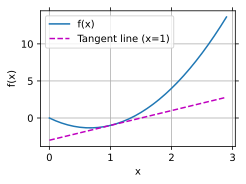

In [58]:
# Use some of the built in functions from d2l and plot the function
# u = f(x) and its tangent line y = 2x-3 at x = 1, 
# where the coefficient 2 is the slop of the tangent line.
x = np.arange(0, 3, 0.1)
d2l.plot(x, [f(x), 2 * x -3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 2.5 Automatic Differentation

2.5.1 A Simple Example

In [59]:
from mxnet import autograd, np, npx

npx.set_np()

x = np.arange(4.0)
x

array([0., 1., 2., 3.])

In [60]:
# allocate memory for a tensor's gradient by inoking `attach_grad`
x.attach_grad()
# After we calculate a gradient taken with respect to `x`, 
# we will be able to access it via the `grad` attribute,
# whose values are initialized with 0s
x.grad

array([0., 0., 0., 0.])

In [61]:
# Place the code inside an `autograd.record` scope to build the 
# computational graph
with autograd.record():
    y = 2 * np.dot(x, x)
y

array(28.)

In [62]:
y.backward()
x.grad

array([ 0.,  4.,  8., 12.])

In [63]:
# the gradient of the function y = 2X^T * x should be 4x
x.grad == 4*x

array([ True,  True,  True,  True])